**1. Input data**

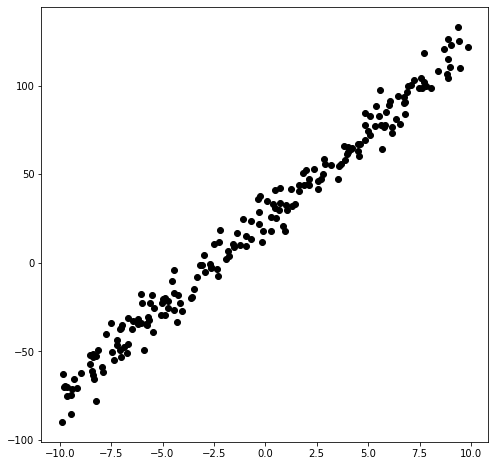

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import linear_model

#reading data
path= "data.csv"
data = np.genfromtxt(path, delimiter=',')

#get values from data file
x_data = data[:, 0]
y_data = data[:, 1]

#get the size of data
datasize = len(x_data)

#visualize results
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.show()


**2. Linear Regression Result**

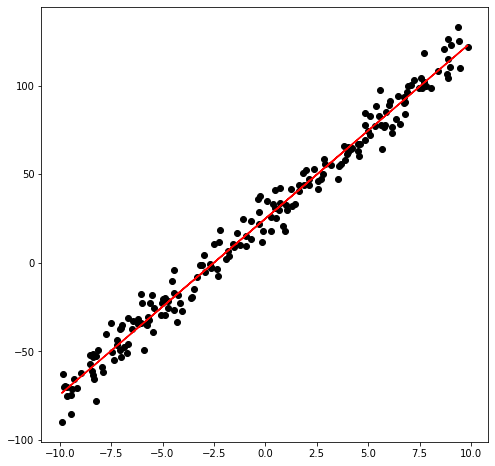

In [56]:
#reshape to prevent the error
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

#train model on data
data_reg = linear_model.LinearRegression()
data_reg.fit(x_data, y_data)

#visualize results
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.plot(x_data, data_reg.predict(x_data), color='red')
plt.show()

**3. Plot the energy surface**

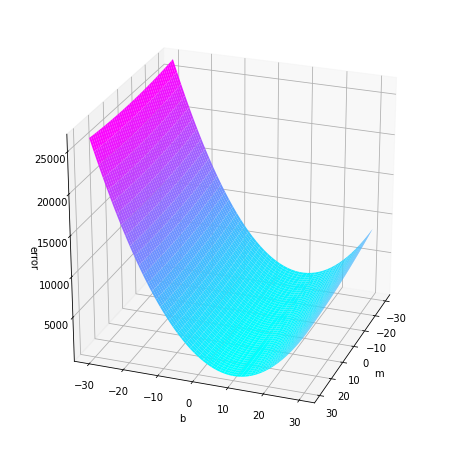

In [57]:
#Compute the error
def compute_error(b, m):
    totalError = 0
    for i in range(datasize):
        totalError += (y_data[i] - (m * x_data[i] + b)) ** 2
    return totalError / (float(datasize) * 2)

#Ploting the energy surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ms = np.arange(-30, 30, 0.1)
bs = np.arange(-30, 30, 0.1)
M, B = np.meshgrid(ms, bs)
Z = compute_error(M, B)
ax.plot_surface(M, B, Z, color='b', cmap = 'cool' )
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')
ax.view_init(25, 20)
plt.show()

**4. Plot the gradient descent path on the energy surface**

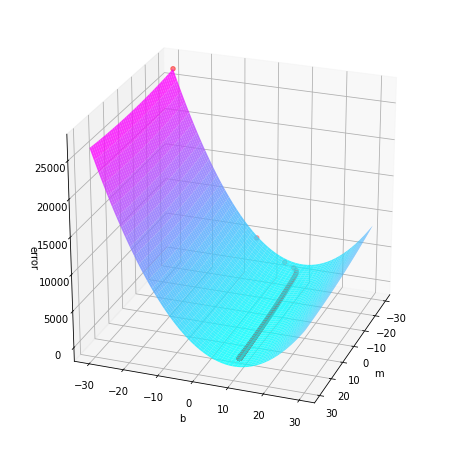

In [72]:
theta0=[]
theta1=[]

def step_gradient(b_current, m_current, data, learningRate):
    b_gradient = 0
    m_gradient = 0    
    N = float(datasize)
    for i in range(0, datasize):
      b_gradient += -(2/N) * (y_data[i] - ((m_current * x_data[i]) + b_current))
      m_gradient += -(2/N) * x_data[i] * (y_data[i] - ((m_current * x_data[i]) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]
    
def gradient_descent_runner(data, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    theta0.append(np.array([b]))
    theta1.append(np.array([m]))
    for i in range(num_iterations):
      b, m = step_gradient(b, m, array(data), learning_rate)
      theta0.append(b)
      theta1.append(m)
    return [b, m]

def run():    
    learning_rate = 0.01
    #initial condition following assignment
    initial_b = -30 
    initial_m = -30 
    num_iterations = 1000    
    [b, m] = gradient_descent_runner(data, initial_b, initial_m, learning_rate, num_iterations)
             
run()

#Ploting the energy surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ms = np.arange(-30, 30, 0.1)
bs = np.arange(-30, 30, 0.1)
M, B = np.meshgrid(ms, bs)
Z = compute_error(M, B)
ax.plot_surface(M, B, Z, cmap = 'cool',alpha=0.8)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')
ax.view_init(25, 20) 

#Plotung the gradient descent path
ax.scatter(theta0,theta1,compute_error(theta0,theta1),color='red')
plt.show()